###Library

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import pickle
from sklearn import svm
import joblib

###Data understanding

In [2]:
#load dataset
student_performance_df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv',sep = ';', encoding='windows-1252')
student_performance_df.head(5)

,ï»¿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
student_performance_df.isna().sum()

ï»¿Marital_status                               0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Tidak terdapat nilai NA didalam dataframe

In [4]:
print('jumlah duplikat:', student_performance_df.duplicated().sum())

jumlah duplikat: 0


Tidak terdapat nilai duplikat pada dataframe

In [5]:
student_performance_df.describe(include='all')

,ï»¿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [6]:
#membuat dataframe baru
df = student_performance_df[['Daytime_evening_attendance', 'Mothers_occupation', 'Fathers_occupation',
                            'Debtor', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International',
                            'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_approved',
                            'Status'
                            ]]

df=df.rename(columns={'Daytime_evening_attendance': 'Evening_class', 'International': 'Class', 'Curricular_units_1st_sem_approved': 'Smt_1_passed',
                   'Curricular_units_2nd_sem_approved': 'Smt_2_passed'})
df.head(5)

,Evening_class,Mothers_occupation,Fathers_occupation,Debtor,Gender,Scholarship_holder,Age_at_enrollment,Class,Smt_1_passed,Smt_2_passed,Status
0,1,5,9,0,1,0,20,0,0,0,Dropout
1,1,3,3,0,1,0,19,0,6,6,Graduate
2,1,9,9,0,1,0,19,0,0,0,Dropout
3,1,5,3,0,0,0,20,0,6,5,Graduate
4,0,9,9,0,0,0,45,0,5,6,Graduate


Menghapus column yang tidak dibutuhkan untuk analisis dan mengganti nama column agar lebih mudah dibaca (readable)

In [7]:
numerical_columns = [
    'Mothers_occupation',
    'Fathers_occupation',
    'Age_at_enrollment',
    'Smt_1_passed',
    'Smt_2_passed'
]

df[numerical_columns].describe()

,Mothers_occupation,Fathers_occupation,Age_at_enrollment,Smt_1_passed,Smt_2_passed
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,10.960895,11.032324,23.265145,4.706600,4.435805
std,26.418253,25.263040,7.587816,3.094238,3.014764
min,0.000000,0.000000,17.000000,0.000000,0.000000
25%,4.000000,4.000000,19.000000,3.000000,2.000000
50%,5.000000,7.000000,20.000000,5.000000,5.000000
75%,9.000000,9.000000,25.000000,6.000000,6.000000
max,194.000000,195.000000,70.000000,26.000000,20.000000


*   level tertinggi Mothers_occupation adalah 20
*   level tertinggi Fathers_occupation adalah 20
*   Age_at_enrollment siswa adalah 35 tahun
*   Jumlah sks Smt_1_passed terbanyak adalah 26 sks
*   Jumlah sks Smt_2_passed terbanyak adalah 20 sks





In [8]:
#cleaning outlier pada kolom 'order_item_id pada data orders_df dengan mengganti dengan upper limit value
q1 = df['Mothers_occupation'].quantile(0.25)
q3 = df['Mothers_occupation'].quantile(0.75)
iqr = q3 - q1
q1, q3, iqr
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)
lower_limit, upper_limit
df = df.copy()
df.loc[df['Mothers_occupation']>upper_limit,'Mothers_occupation'] = upper_limit
df.loc[df['Mothers_occupation']<lower_limit,'Mothers_occupation'] = lower_limit

q1 = df['Fathers_occupation'].quantile(0.25)
q3 = df['Fathers_occupation'].quantile(0.75)
iqr = q3 - q1
q1, q3, iqr
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)
lower_limit, upper_limit
df = df.copy()
df.loc[df['Fathers_occupation']>upper_limit,'Fathers_occupation'] = upper_limit
df.loc[df['Fathers_occupation']<lower_limit,'Fathers_occupation'] = lower_limit

q1 = df['Age_at_enrollment'].quantile(0.25)
q3 = df['Age_at_enrollment'].quantile(0.75)
iqr = q3 - q1
q1, q3, iqr
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)
lower_limit, upper_limit
df = df.copy()
df.loc[df['Age_at_enrollment']>upper_limit,'Age_at_enrollment'] = upper_limit
df.loc[df['Age_at_enrollment']<lower_limit,'Age_at_enrollment'] = lower_limit

In [9]:
df[numerical_columns].describe()

,Mothers_occupation,Fathers_occupation,Age_at_enrollment,Smt_1_passed,Smt_2_passed
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,6.257459,6.585104,22.457052,4.706600,4.435805
std,3.501373,3.359186,5.409813,3.094238,3.014764
min,0.000000,0.000000,17.000000,0.000000,0.000000
25%,4.000000,4.000000,19.000000,3.000000,2.000000
50%,5.000000,7.000000,20.000000,5.000000,5.000000
75%,9.000000,9.000000,25.000000,6.000000,6.000000
max,16.500000,16.500000,34.000000,26.000000,20.000000


Semua outlier telah dihilangkan/ digantikan dengan nilai upper limit

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Evening_class       4424 non-null   int64  
 1   Mothers_occupation  4424 non-null   float64
 2   Fathers_occupation  4424 non-null   float64
 3   Debtor              4424 non-null   int64  
 4   Gender              4424 non-null   int64  
 5   Scholarship_holder  4424 non-null   int64  
 6   Age_at_enrollment   4424 non-null   int64  
 7   Class               4424 non-null   int64  
 8   Smt_1_passed        4424 non-null   int64  
 9   Smt_2_passed        4424 non-null   int64  
 10  Status              4424 non-null   object 
dtypes: float64(2), int64(8), object(1)
memory usage: 380.3+ KB


selain kolom status, kolom bertipe int/float karena data beruapa angka

###Exploratory data analysis

In [11]:
r_df = df.copy()
r_df['Evening_class'] = r_df['Evening_class'].apply(lambda x: 'Ada kelas' if x>=1 else 'Tidak ada kelas')
r_df['Debtor'] = r_df['Debtor'].apply(lambda x: 'Lunas' if x>=1 else 'Belum Lunas')
r_df['Gender'] = r_df['Gender'].apply(lambda x: 'Perempuan' if x>=1 else 'Laki-laki')
r_df['Scholarship_holder'] = r_df['Scholarship_holder'].apply(lambda x: 'Beasiswa' if x>=1 else 'Mandiri')
r_df['Class'] = r_df['Class'].apply(lambda x: 'Internasional' if x>=1 else 'Regular')
r_df.head()

,Evening_class,Mothers_occupation,Fathers_occupation,Debtor,Gender,Scholarship_holder,Age_at_enrollment,Class,Smt_1_passed,Smt_2_passed,Status
0,Ada kelas,5.0,9.0,Belum Lunas,Perempuan,Mandiri,20,Regular,0,0,Dropout
1,Ada kelas,3.0,3.0,Belum Lunas,Perempuan,Mandiri,19,Regular,6,6,Graduate
2,Ada kelas,9.0,9.0,Belum Lunas,Perempuan,Mandiri,19,Regular,0,0,Dropout
3,Ada kelas,5.0,3.0,Belum Lunas,Laki-laki,Mandiri,20,Regular,6,5,Graduate
4,Tidak ada kelas,9.0,9.0,Belum Lunas,Laki-laki,Mandiri,34,Regular,5,6,Graduate




*   Evening_class adalah jadwal kelas pada malam hari
*   Mothers_occupation adalah level pekerjaan ibu siswa
*   Fathers_occupation adalah level pekerjaan ayah siswa
*   Debtor adalah status pembayaran uang sekolah siswa
*   Scholarship_holder adalah status pembayaran siswa (mandiri/beasiswa)
*   Age_at_enrollment adalah umur siswa saat memulai sekolah
*   Class adalah kelas yang dipilih siswa (Regular/ Internasional)
*   Smt_1_passed adalah jumlah sks yang telah diselesai siswa pada semester 1
*   Smt_2_passed adalah jumlah sks yang telah diselesaikan siswa pada semester 2
*   Status adalah status siswa disekolah (Enrolled/ Graduate/ Dropout)





####1. Bagaimana perbandingan siswa berdasarkan feature categorical dan featuru numeric?

Evening_class
Ada kelas          3941
Tidak ada kelas     483
Name: count, dtype: int64
Debtor
Belum Lunas    3921
Lunas           503
Name: count, dtype: int64
Scholarship_holder
Mandiri     3325
Beasiswa    1099
Name: count, dtype: int64
Class
Regular          4314
Internasional     110
Name: count, dtype: int64
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


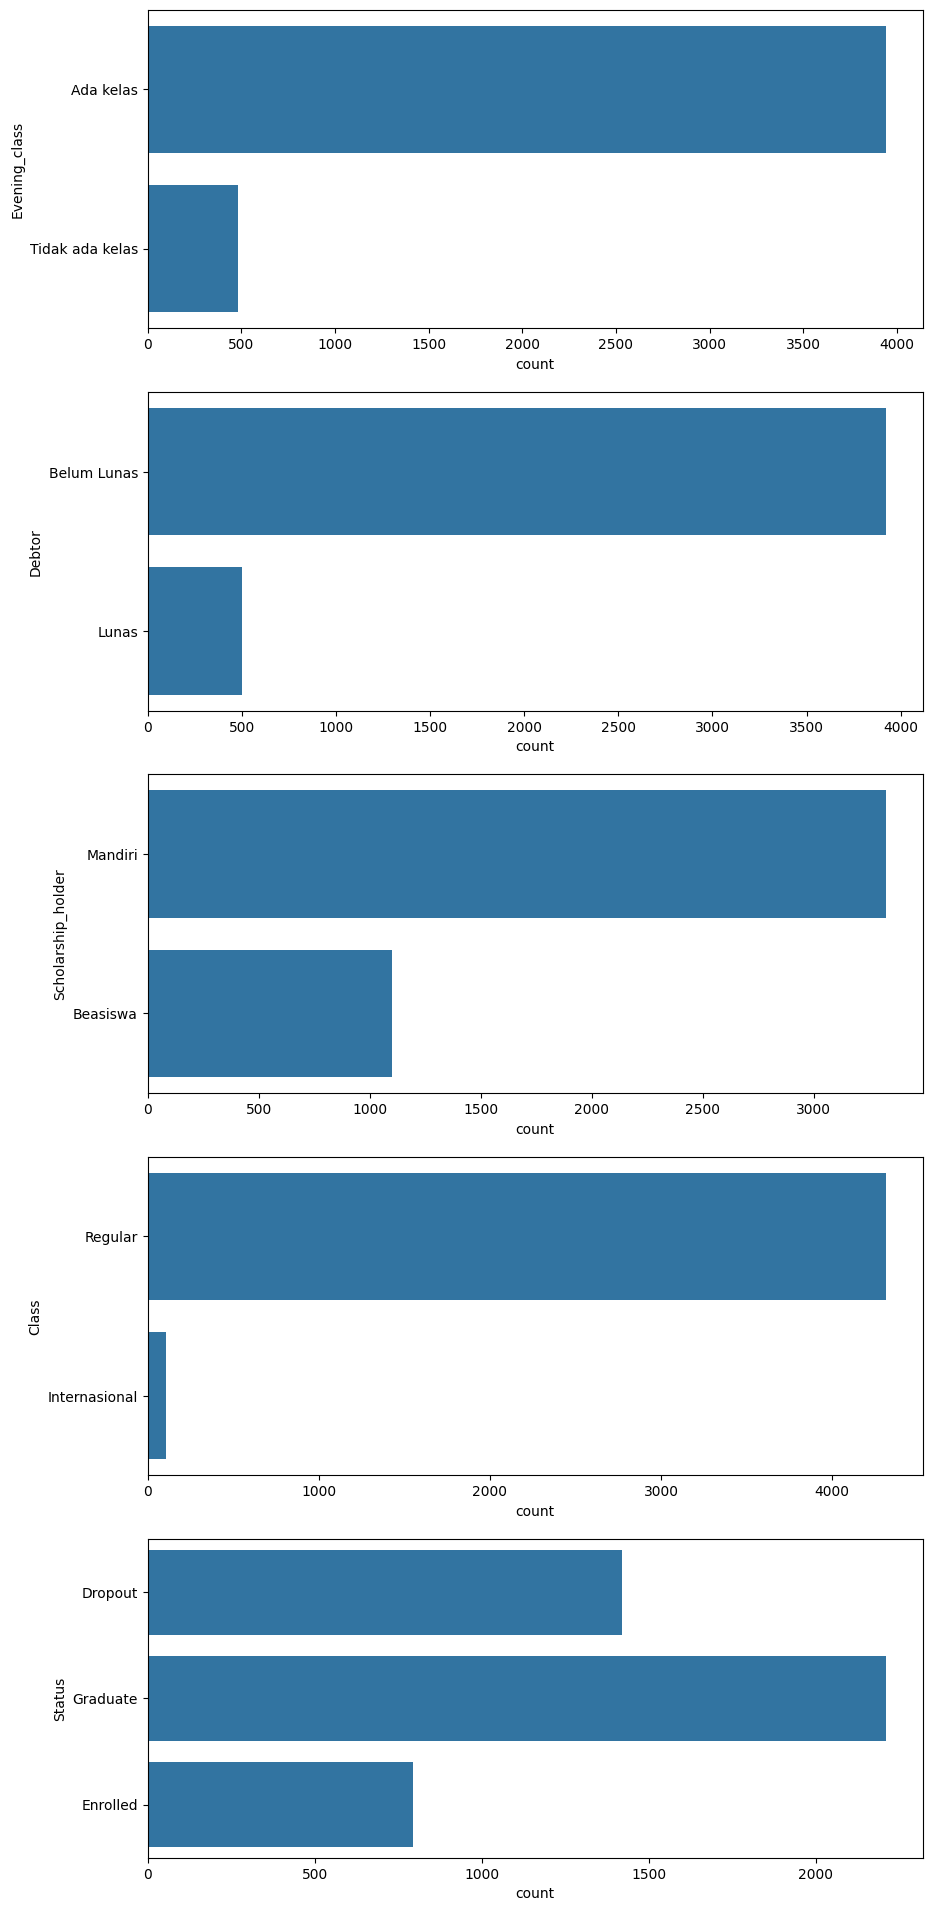

In [12]:
#visualisasi data untuk feature categorical

categorical_columns = [
    'Evening_class',
    'Debtor',
    'Scholarship_holder',
    'Class',
    'Status'
]

for col in categorical_columns:
    print(r_df[col].value_counts())

fig, ax = plt.subplots(len(categorical_columns), 1, figsize= (10,24))
for i, feature in enumerate(categorical_columns):
  sns.countplot(data= r_df, y=feature, ax=ax[i])
plt.show()

Dari hasil analisis diatas dapat kita lihat:
*   3941 siswa memiliki kelas malam, dan hanya sekitar 483 siswa yang tidak memiliki kelas malam
*   3921 siswa belum melunasi uang sekolah, dan hanya 503 siswa saja yang telah melunasi uang sekolah

*   Sebanyak 3325 siswa membiayai sekolahnya secara mandiri dan hanya 1099 siswa yang mendapatkan beasiswa

*   4314 siswa lebih memilih kelas regular dan hanya terdapat 110 siswa dikelas internasional
*   Siswa yang telah lulus mencapai lebih dari 20009 siswa dengan jumlah dropout lebih dari 1421 siswa dan 794 siswa aktif





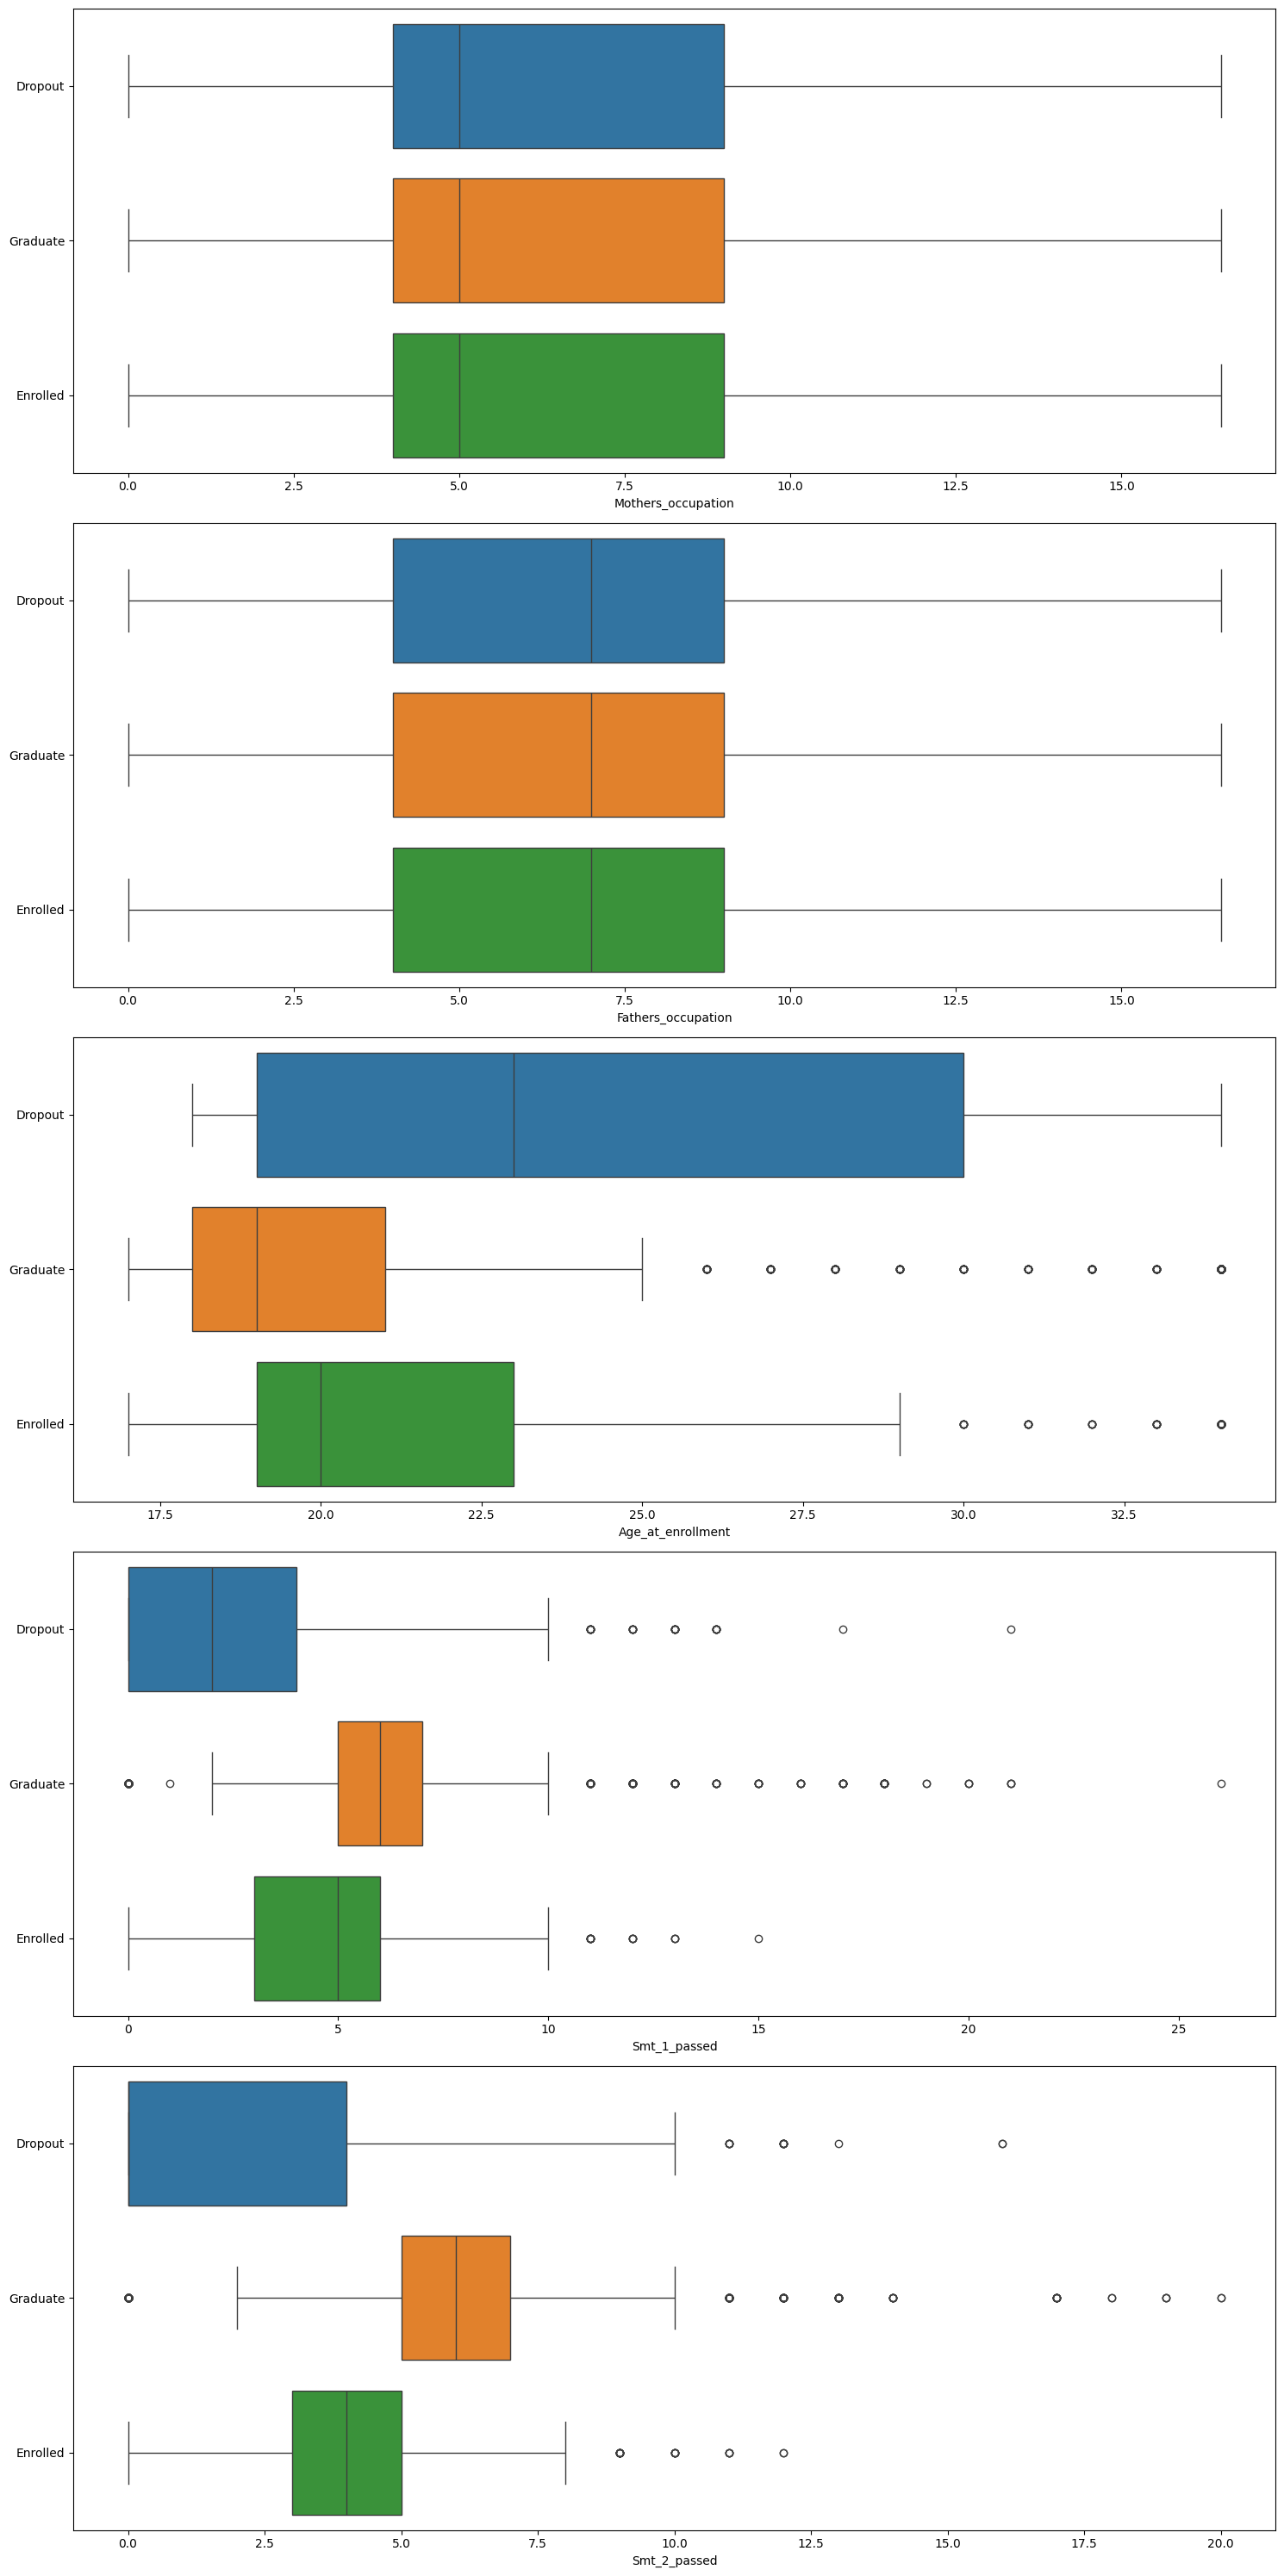

In [13]:
numerical_columns = [
    'Mothers_occupation',
    'Fathers_occupation',
    'Age_at_enrollment',
    'Smt_1_passed',
    'Smt_2_passed'
]

#visualisasi untuk feature numerik.

def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
  fig, ax = plt.subplots(len(features), 1, figsize=(15,30))
  for i, feature in enumerate(features):
    if segment_feature:
      sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers, hue = segment_feature)
      ax[i].set_ylabel(None)
    else:
      sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
  plt.tight_layout()
  plt.show

numerical_dis_plot(
    features= numerical_columns,
    df= df,
    segment_feature='Status'
)

Berdasarkan analisis diatas dapat kita lihat:


*   Level pekerjaan ibu & bapak siswa berdasarkan status rata-rata berada pada level yang sama
*   Siswa dengan umur diatas 24 tahun saat mendaftar lebih banyak mengalami dropout dibandingkan siswa yang lulus dan siswa akitf

*   Siswa mengalami dropout rata-rata hanya mampu menyelesaikan sks kurang dari 5 sks pada semester 1 dan semester 2


####2. Variabel yang paling mempengaruhi terjadinya dropout?

In [14]:
df_cor = df.copy()
df_cor['Status'] = df_cor['Status'].replace({'Dropout':0, 'Enrolled':1, 'Graduate':2})
df_cor.head(5)

,Evening_class,Mothers_occupation,Fathers_occupation,Debtor,Gender,Scholarship_holder,Age_at_enrollment,Class,Smt_1_passed,Smt_2_passed,Status
0,1,5.0,9.0,0,1,0,20,0,0,0,0
1,1,3.0,3.0,0,1,0,19,0,6,6,2
2,1,9.0,9.0,0,1,0,19,0,0,0,0
3,1,5.0,3.0,0,0,0,20,0,6,5,2
4,0,9.0,9.0,0,0,0,34,0,5,6,2


In [15]:
df_cor.corr()

,Evening_class,Mothers_occupation,Fathers_occupation,Debtor,Gender,Scholarship_holder,Age_at_enrollment,Class,Smt_1_passed,Smt_2_passed,Status
Evening_class,1.000000,-0.064003,-0.026196,0.006658,-0.012326,0.093912,-0.488982,0.027973,0.016935,0.034022,0.075107
Mothers_occupation,-0.064003,1.000000,0.598750,0.093050,-0.014077,0.097730,0.126492,0.040087,-0.005985,0.003355,0.018147
Fathers_occupation,-0.026196,0.598750,1.000000,0.056220,-0.030642,0.085111,0.039706,0.021670,-0.001828,0.006182,0.027274
Debtor,0.006658,0.093050,0.056220,1.000000,0.053812,-0.067489,0.116514,0.075423,-0.106657,-0.146977,-0.240999
Gender,-0.012326,-0.014077,-0.030642,0.053812,1.000000,-0.169302,0.163809,-0.026415,-0.183829,-0.224266,-0.229270
Scholarship_holder,0.093912,0.097730,0.085111,-0.067489,-0.169302,1.000000,-0.210277,-0.027972,0.153772,0.202704,0.297595
Age_at_enrollment,-0.488982,0.126492,0.039706,0.116514,0.163809,-0.210277,1.000000,-0.003294,-0.071663,-0.132544,-0.283631
Class,0.027973,0.040087,0.021670,0.075423,-0.026415,-0.027972,-0.003294,1.000000,0.005290,-0.010565,0.003934
Smt_1_passed,0.016935,-0.005985,-0.001828,-0.106657,-0.183829,0.153772,-0.071663,0.005290,1.000000,0.904002,0.529123
Smt_2_passed,0.034022,0.003355,0.006182,-0.146977,-0.224266,0.202704,-0.132544,-0.010565,0.904002,1.000000,0.624157


In [16]:
df_corr_abs = df_cor.corr()
df_corr_abs = df_corr_abs['Status'].drop('Status')
df_corr_abs.abs().sort_values(ascending=False)

Smt_2_passed          0.624157
Smt_1_passed          0.529123
Scholarship_holder    0.297595
Age_at_enrollment     0.283631
Debtor                0.240999
Gender                0.229270
Evening_class         0.075107
Fathers_occupation    0.027274
Mothers_occupation    0.018147
Class                 0.003934
Name: Status, dtype: float64

In [17]:
df_corr_to_charge = pd.DataFrame({
    'variables': ['Evening_class', 'Mothers_occupation', 'Fathers_occupation', 'Debtor', 'Gender', 'Scholarship_holder',
                  'Age_at_enrollment', 'Class', '1st_smt_passed', '2nd_smt_passed'],
    'corr_values': [0.075107, 0.018147, 0.027274, abs(-0.240999), abs(-0.229270), 0.297595, abs(-0.283631),
                    0.003934, 0.529123, 0.624157]
})
df_corr_to_charge.sort_values(by=('corr_values'), ascending=False)

,variables,corr_values
9,2nd_smt_passed,0.624157
8,1st_smt_passed,0.529123
5,Scholarship_holder,0.297595
6,Age_at_enrollment,0.283631
3,Debtor,0.240999
4,Gender,0.229270
0,Evening_class,0.075107
2,Fathers_occupation,0.027274
1,Mothers_occupation,0.018147
7,Class,0.003934


Berdasarkan analisis diatas, banyak sks yang diselesaikan pada semester 2 menjadi variabel yang paling dengan nilai korelasi 0,62

####3. Bagaimana distribusi Dropout berdasarkan jenis kelamin dan umur masuk sekolah siswa?

In [18]:
#membuat dataframe khusus siswa yang berstatus dropout
drop_df = r_df
drop_df = drop_df[drop_df['Status']== 'Dropout']
drop_df.head(5)

,Evening_class,Mothers_occupation,Fathers_occupation,Debtor,Gender,Scholarship_holder,Age_at_enrollment,Class,Smt_1_passed,Smt_2_passed,Status
0,Ada kelas,5.0,9.0,Belum Lunas,Perempuan,Mandiri,20,Regular,0,0,Dropout
2,Ada kelas,9.0,9.0,Belum Lunas,Perempuan,Mandiri,19,Regular,0,0,Dropout
7,Ada kelas,9.0,9.0,Belum Lunas,Perempuan,Mandiri,22,Regular,0,0,Dropout
9,Ada kelas,4.0,7.0,Lunas,Laki-laki,Mandiri,18,Regular,5,2,Dropout
12,Ada kelas,4.0,9.0,Belum Lunas,Laki-laki,Mandiri,19,Regular,0,0,Dropout


,count
Gender,
Laki-laki,720
Perempuan,701


Text(0, 0.5, '')

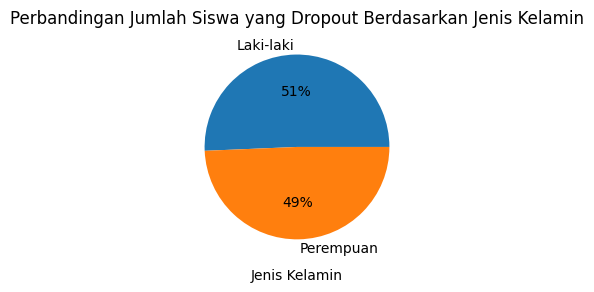

In [19]:
display(drop_df.Gender.value_counts().to_frame())
ax = drop_df.Gender.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(3,3))
plt.title('Perbandingan Jumlah Siswa yang Dropout Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel(None)

Berdasarkan diagram diatas, tidak terlihat perbedaan yang signifikan antara siswa laki-laki dan perempuan yang berstatus dropout, perbedaan hanya berkisar 2% atau 19 siswa

In [20]:
male_series = r_df[r_df.Gender=='Perempuan']['Age_at_enrollment'].groupby(r_df.Age_at_enrollment).size()
female_series = r_df[r_df.Gender=='Laki-laki']['Age_at_enrollment'].groupby(r_df.Age_at_enrollment).size()

age_by_sex = pd.DataFrame({
    'Perempuan': male_series,
    'Laki-laki': female_series,
})
print('Jumlah baris dan kolom: ', age_by_sex.shape)
print('\nJumlah terendah :')
display(age_by_sex.min())
print('\nJumlah tertinggi :')
display(age_by_sex.max())
display(age_by_sex.head())

Jumlah baris dan kolom:  (18, 2)

Jumlah terendah :


Perempuan    2
Laki-laki    3
dtype: int64


Jumlah tertinggi :


Perempuan    261
Laki-laki    789
dtype: int64

,Perempuan,Laki-laki
Age_at_enrollment,,
17,2,3
18,247,789
19,261,650
20,196,403
21,120,202


Text(0, 0.5, 'Jumlah')

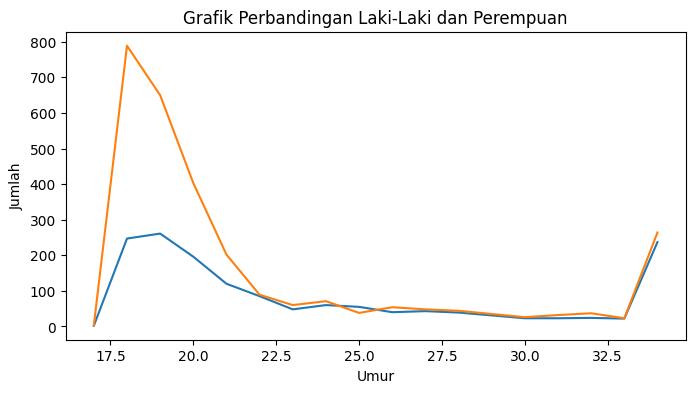

In [21]:
plt.figure(figsize=(8,4))
ax = male_series.plot(kind='line')
ax = female_series.plot(kind='line')

plt.title('Grafik Perbandingan Laki-Laki dan Perempuan')
plt.xlabel('Umur')
plt.ylabel('Jumlah')

Berdasarkan grafik diatas, umur mendaftar siswa 18 - 20 memiliki status siswa dropout tertinggi, khususnya siswa perempuan yang mencapai berkisar 800 siswa pada titik puncaknya

####4. Bagaimana perbandingan status siswa berdasarkan sks yang diselesaikan disetiap semester?

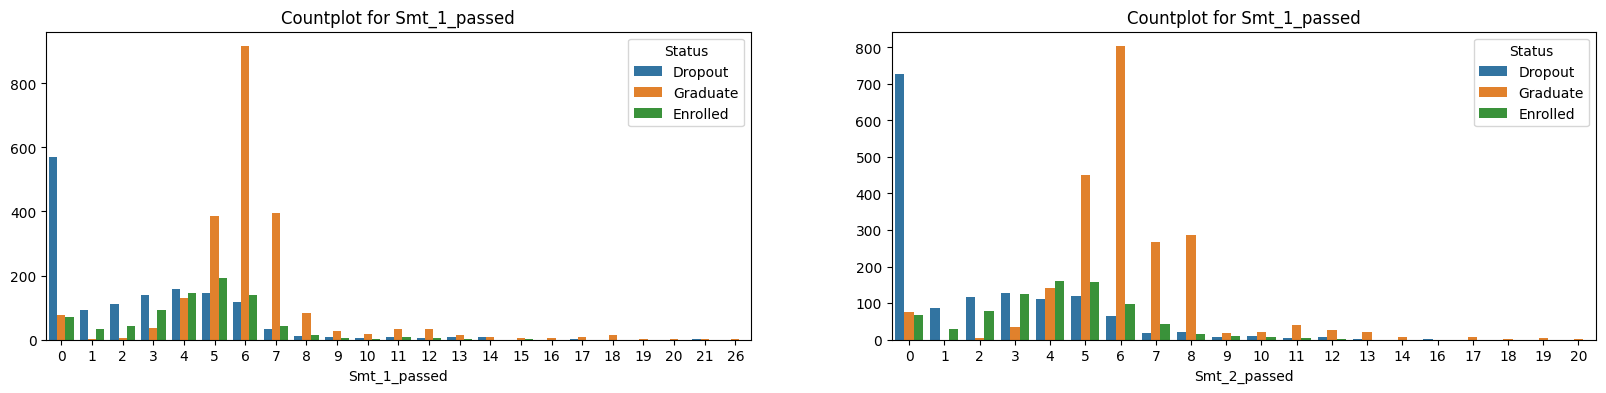

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
sns.countplot(x='Smt_1_passed', hue='Status', data=df, ax=ax[0])
ax[0].set_title('Countplot for Smt_1_passed')
ax[0].set_xlabel('Smt_1_passed')
ax[0].set_ylabel(None)

sns.countplot(x='Smt_2_passed', hue='Status', data=df, ax=ax[1])
ax[1].set_title('Countplot for Smt_1_passed')
ax[1].set_xlabel('Smt_2_passed')
ax[1].set_ylabel(None)
plt.show()

Berdasarkan analisa diatas, siswa berstatus dropout mayoritas tidak mampu menyelesaikan satu skspun pada semester 1 dan semester 2, sedangkan siswa yang berhasil menyelesaikan 6 sks pada semester 1 dan semester 2 paling banyak berstatus sudah lulus

####5.Bagaimana sebaran status siswa berdasarkan umur, jenis kelamin dan sks yang diselesaikan disetiap semesternya?

<Figure size 1200x500 with 0 Axes>

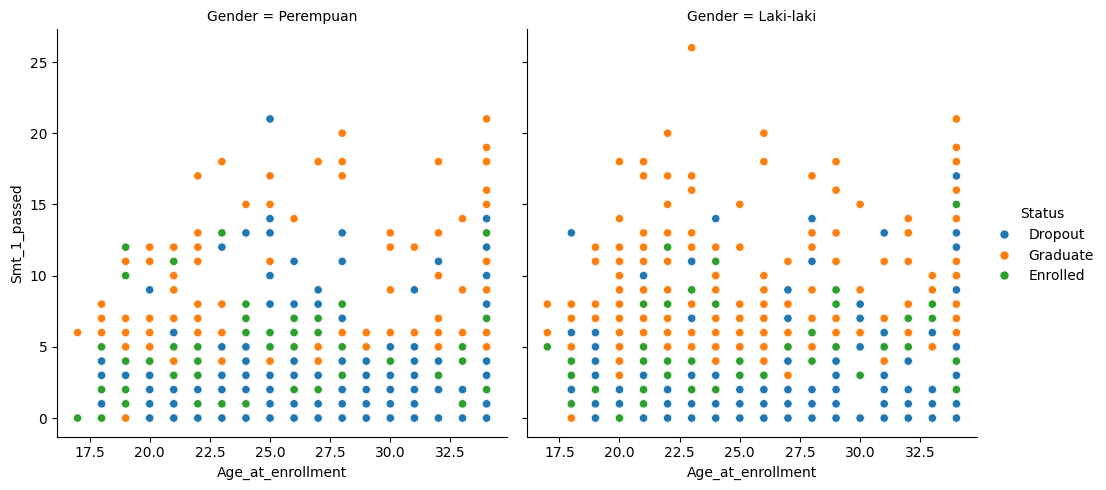

In [23]:
plt.figure(figsize=(12, 5))
sns.relplot(x='Age_at_enrollment', y='Smt_1_passed', col='Gender', hue='Status', data=r_df)

<Figure size 1200x500 with 0 Axes>

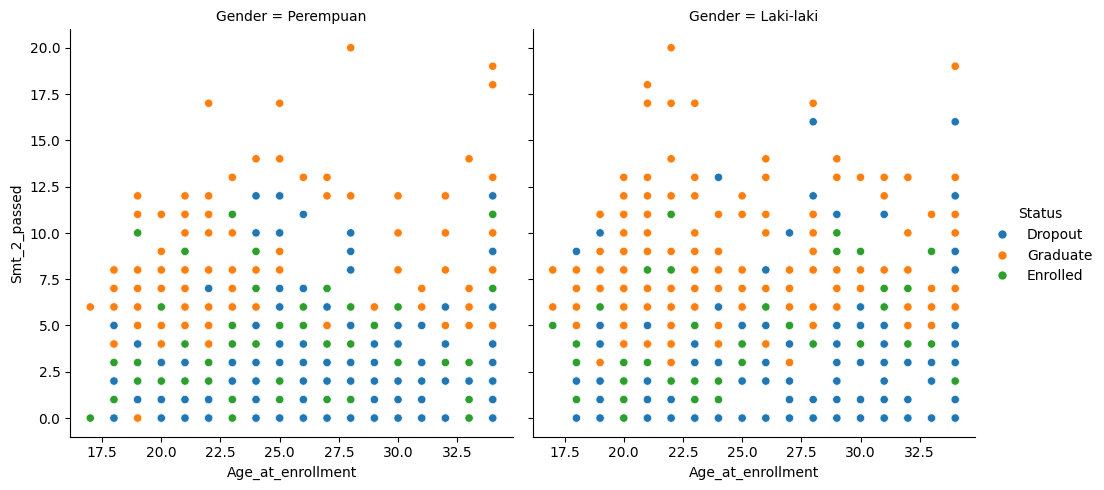

In [24]:
plt.figure(figsize=(12, 5))
sns.relplot(x='Age_at_enrollment', y='Smt_2_passed', col='Gender', hue='Status', data=r_df)

Berdasarkan analisa diatas, jika dilihat dari jumlah sks yang diselesaikan, setiap jenis kelamin & kelompok umur memiliki sebaran yang hampir sama dimana siswa dengan sks kurang dari 5 pada semester 1 & 2 banyak yang berstatus dropout sedangkan siswa berstatus graduate mayoritas memiliki jumlah sks yang diselesaikan lebih dari 5 sks. Terlihat juga siswa yang masih berstatus aktif masih banyak yang baru menyelesaikan sks kurang dari 5 sks pada semester 1 & 2

####6.Berapa jumlah & persentase siswa yang berstatus dropout berdasarkan kelas?

,count
Class,
Regular,1389
Internasional,32


Text(0, 0.5, '')

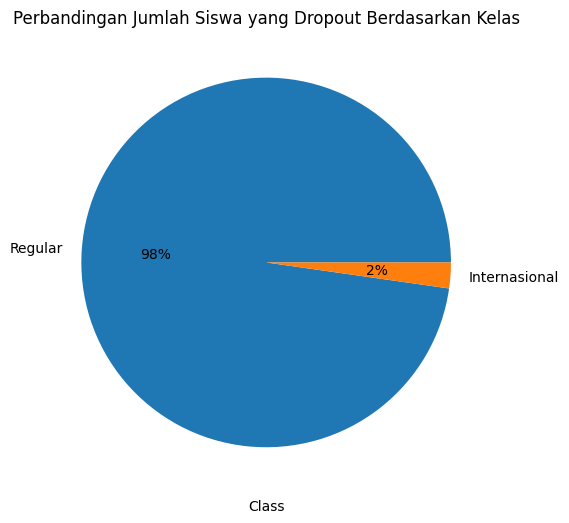

In [25]:
display(drop_df.Class.value_counts().to_frame())
ax = drop_df.Class.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(6,6))
plt.title('Perbandingan Jumlah Siswa yang Dropout Berdasarkan Kelas')
plt.xlabel('Class')
plt.ylabel(None)

Dari hasil analisa diatas, terdapat 1389 siswa kelas regular yang berstatus dropout atau sekitar 98% dari total keseluruhan siswa berstatus dropout, sedangkan untuk kelas internasional terdapat 32 siswa berstatus dropout atau sekitar 2% dari keseluruhan siswa yang berstatus dropout

####7.Jelaskan jumlah pembiayaan siswa berstatus dropout berdasarkan variabel-variabel lainnya?

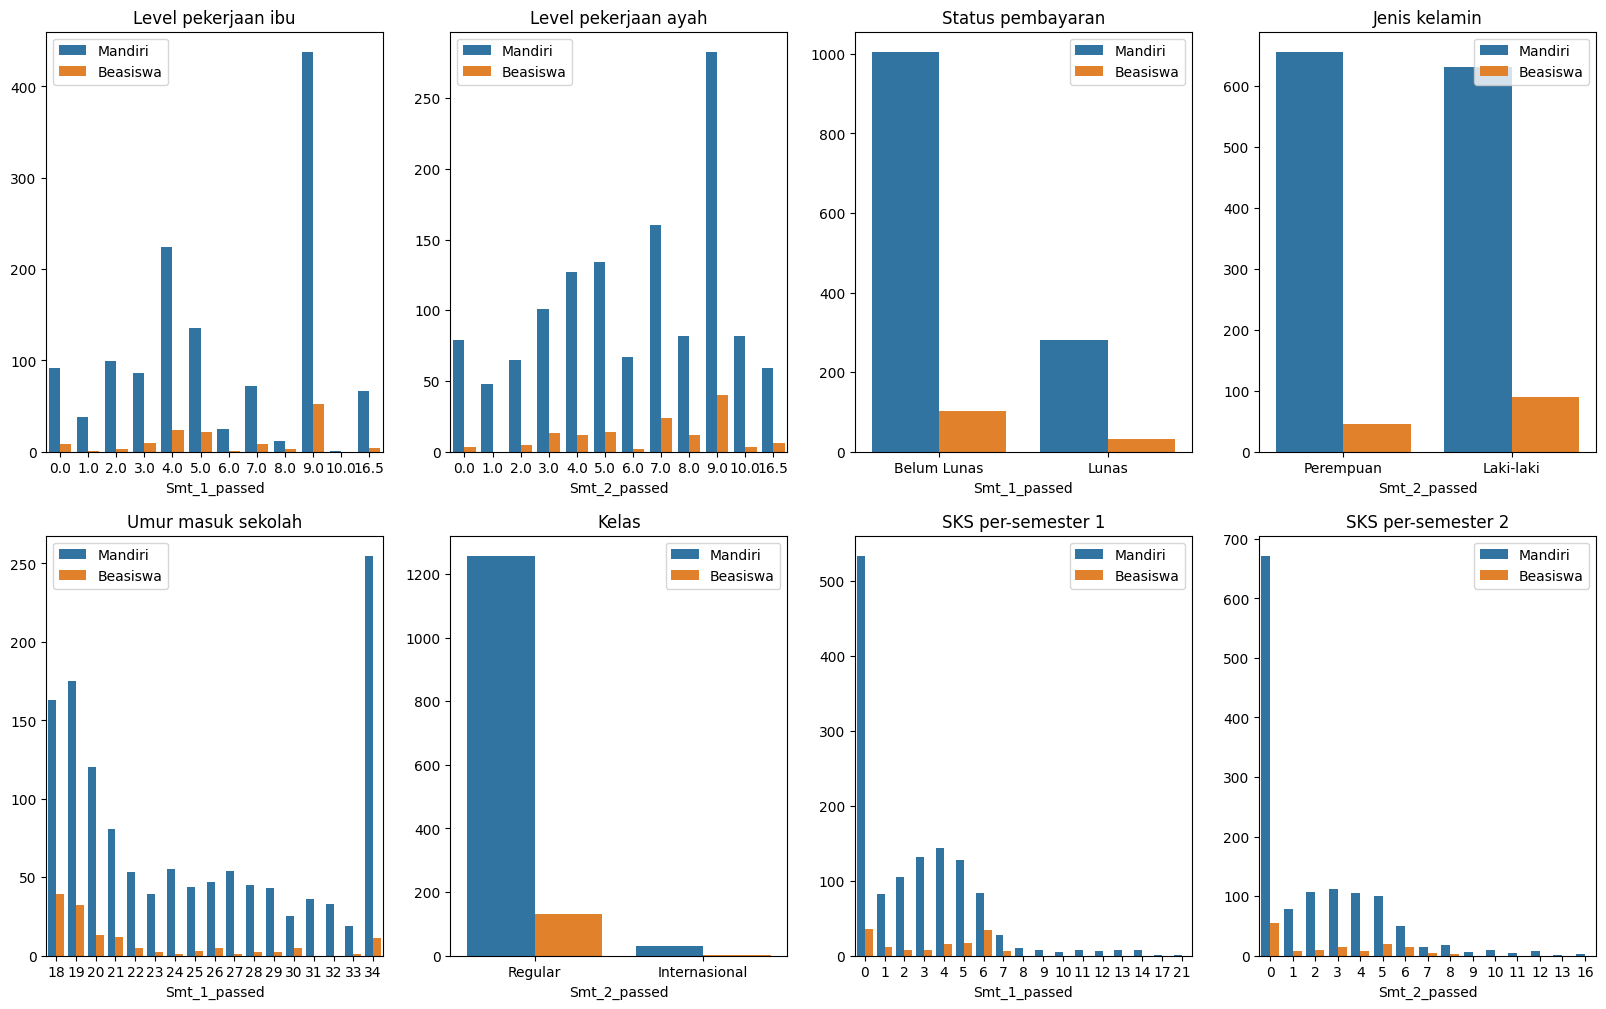

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))
sns.countplot(x='Mothers_occupation', hue='Scholarship_holder', data=drop_df, ax=ax[0][0])
ax[0][0].set_title('Level pekerjaan ibu')
ax[0][0].set_xlabel('Smt_1_passed')
ax[0][0].set_ylabel(None)
ax[0][0].legend(loc='best')

sns.countplot(x='Fathers_occupation', hue='Scholarship_holder', data=drop_df, ax=ax[0][1])
ax[0][1].set_title('Level pekerjaan ayah')
ax[0][1].set_xlabel('Smt_2_passed')
ax[0][1].set_ylabel(None)
ax[0][1].legend(loc='best')

sns.countplot(x='Debtor', hue='Scholarship_holder', data=drop_df, ax=ax[0][2])
ax[0][2].set_title('Status pembayaran')
ax[0][2].set_xlabel('Smt_1_passed')
ax[0][2].set_ylabel(None)
ax[0][2].legend(loc='best')

sns.countplot(x='Gender', hue='Scholarship_holder', data=drop_df, ax=ax[0][3])
ax[0][3].set_title('Jenis kelamin')
ax[0][3].set_xlabel('Smt_2_passed')
ax[0][3].set_ylabel(None)
ax[0][3].legend(loc='best')

sns.countplot(x='Age_at_enrollment', hue='Scholarship_holder', data=drop_df, ax=ax[1][0])
ax[1][0].set_title('Umur masuk sekolah')
ax[1][0].set_xlabel('Smt_1_passed')
ax[1][0].set_ylabel(None)
ax[1][0].legend(loc='best')

sns.countplot(x='Class', hue='Scholarship_holder', data=drop_df, ax=ax[1][1])
ax[1][1].set_title('Kelas')
ax[1][1].set_xlabel('Smt_2_passed')
ax[1][1].set_ylabel(None)
ax[1][1].legend(loc='best')

sns.countplot(x='Smt_1_passed', hue='Scholarship_holder', data=drop_df, ax=ax[1][2])
ax[1][2].set_title('SKS per-semester 1')
ax[1][2].set_xlabel('Smt_1_passed')
ax[1][2].set_ylabel(None)
ax[1][2].legend(loc='best')

sns.countplot(x='Smt_2_passed', hue='Scholarship_holder', data=drop_df, ax=ax[1][3])
ax[1][3].set_title('SKS per-semester 2')
ax[1][3].set_xlabel('Smt_2_passed')
ax[1][3].set_ylabel(None)
ax[1][3].legend(loc='best')
plt.show()

Berdasarkan analisa diatas pada semua variabel jumlah siswa dropout dengan pembiayain mandiri jauh lebih tinggi dibandingkan penerima beasiswa, adapun per-variabelnya sebagai berikut:


*   Pekerjaan ibu & ayah pada level 9 memiliki jumlah siswa dropout dengan pembiayan mandiri terbanyak
*   Lebih dari 1000 siswa berstatus dropout belum melunasi biaya sekolah, khususnya pembiayain mandiri yang mencapai 1000 siswa
*   Jumlah siswa dropout berdasarkan jenis kelamin tidak menunjukkan perbedaan yang signifikan baik mandiri maupun beasiswa.
*   Umur masuk sekolah 34 tahun menjadi umur dengan siswa dropout pembiayain mandiri terbanyak
*   Jumlah siswa dropout dikelas regular dengan pembiayaan mandiri sangat tinggi dibandingkan dengan siswa dropout yang mendapatkan beasiswa
*   Siswa yang tidak menyelesaikan satu skspun pada semester 1 dan semester 2 menjadi penyumbang dropout terbanyak, selain itu perbedaan antara pembiayaan mandiri dan beasiswa sangat signifikan, dimana jumlah pembiayaan mandiri pada 0 sks mencapai lebih dari 500 siswa/ semester, sedangkan untuk beasiswa hanya mencapai kurang dari 100 siswa/ semester





####8. Jelaskan pembagian status siswa berdasarkan jenis kelas dan jadwal kelas malam hari?

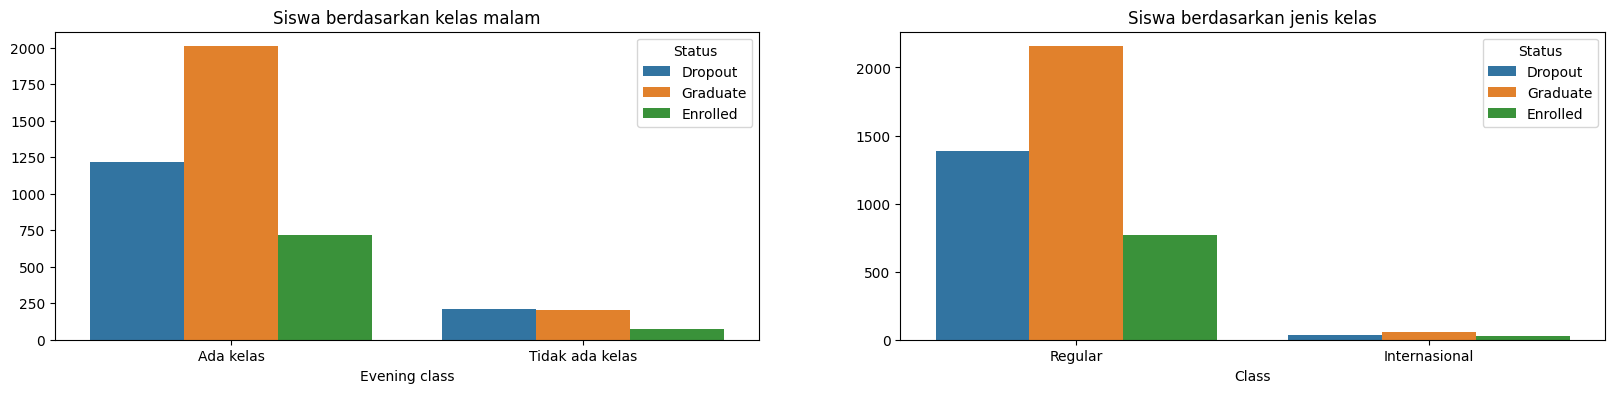

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
sns.countplot(x='Evening_class', hue='Status', data=r_df, ax=ax[0])
ax[0].set_title('Siswa berdasarkan kelas malam')
ax[0].set_xlabel('Evening class')
ax[0].set_ylabel(None)

sns.countplot(x='Class', hue='Status', data=r_df, ax=ax[1])
ax[1].set_title('Siswa berdasarkan jenis kelas')
ax[1].set_xlabel('Class')
ax[1].set_ylabel(None)
plt.show()

Berdasarkan hasil analisa diatas terlihat jumlah siswa berstatus dropout yang memiliki kelas malam lebih banyak dibandingkan tidak memiliki kelas malam

Sedangkan berdasarkan jenis kelas, kelas regular menjadi penyumbang siswa dropout terbanyak dibandingkan kelas lainnya

###Data preprocessing

####Train test split

In [28]:
df

,Evening_class,Mothers_occupation,Fathers_occupation,Debtor,Gender,Scholarship_holder,Age_at_enrollment,Class,Smt_1_passed,Smt_2_passed,Status
0,1,5.0,9.0,0,1,0,20,0,0,0,Dropout
1,1,3.0,3.0,0,1,0,19,0,6,6,Graduate
2,1,9.0,9.0,0,1,0,19,0,0,0,Dropout
3,1,5.0,3.0,0,0,0,20,0,6,5,Graduate
4,0,9.0,9.0,0,0,0,34,0,5,6,Graduate
...,...,...,...,...,...,...,...,...,...,...,...
4419,1,5.0,4.0,0,1,0,19,0,5,5,Graduate
4420,1,9.0,9.0,1,0,0,18,1,6,2,Dropout
4421,1,9.0,9.0,0,0,1,30,0,7,1,Dropout
4422,1,7.0,4.0,0,0,1,20,0,5,5,Graduate


In [30]:
data_df = df.copy()
data_df['Status'] = data_df['Status'].map({'Graduate': 0, 'Dropout': 1, 'Enrolled': 2})
data_df

,Evening_class,Mothers_occupation,Fathers_occupation,Debtor,Gender,Scholarship_holder,Age_at_enrollment,Class,Smt_1_passed,Smt_2_passed,Status
0,1,5.0,9.0,0,1,0,20,0,0,0,1
1,1,3.0,3.0,0,1,0,19,0,6,6,0
2,1,9.0,9.0,0,1,0,19,0,0,0,1
3,1,5.0,3.0,0,0,0,20,0,6,5,0
4,0,9.0,9.0,0,0,0,34,0,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...
4419,1,5.0,4.0,0,1,0,19,0,5,5,0
4420,1,9.0,9.0,1,0,0,18,1,6,2,1
4421,1,9.0,9.0,0,0,1,30,0,7,1,1
4422,1,7.0,4.0,0,0,1,20,0,5,5,0


,count
Status,
0,2209
1,1421
2,794


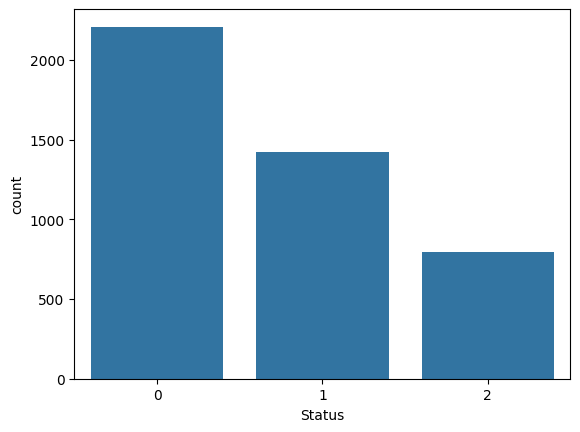

In [31]:
display(data_df.Status.value_counts().to_frame())
sns.countplot(data=data_df, x='Status')
plt.show()

Terdapat inbalaced pada data, karena jumlah siswa graduate lebih banyak dibandingkan kelas lainnya

,count
Status,
2,2209
1,2209
0,2209


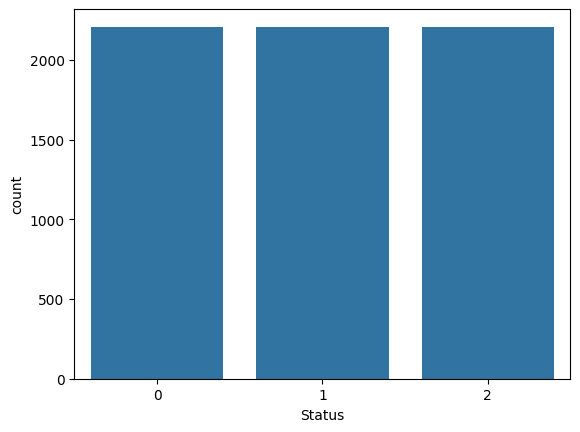

In [32]:
df_majority_1 = data_df[(data_df.Status == 0)]
df_majority_2 = data_df[(data_df.Status == 1)]
df_minority = data_df[(data_df.Status == 2)]


df_majority_2_undersampled = resample(df_majority_2, n_samples=2209, random_state=42)
df_minority_undersampled = resample(df_minority, n_samples=2209, random_state=42)

oversampled_df = pd.concat([df_majority_1, df_majority_2_undersampled]).reset_index(drop=True)
oversampled_df = pd.concat([oversampled_df, df_minority_undersampled]).reset_index(drop=True)
oversampled_df = shuffle(oversampled_df, random_state=42)
oversampled_df.reset_index(drop=True, inplace=True)

display(oversampled_df.Status.value_counts().to_frame())
sns.countplot(data=oversampled_df, x='Status')
plt.show()

Inbalanced data berhasil diatasi dengan metode oversampled

In [33]:
#memisahkan atribut & label
X= oversampled_df.drop(columns='Status')
y = oversampled_df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display('Jumlah data untuk X_train :', X_train.shape[0])
display('Jumlah data untuk X_test :', X_test.shape[0])
display('Jumlah data untuk y_train :', y_train.shape[0])
display('Jumlah data untuk y_test :', y_test.shape[0])

'Jumlah data untuk X_train :'

5301

'Jumlah data untuk X_test :'

1326

'Jumlah data untuk y_train :'

5301

'Jumlah data untuk y_test :'

1326

###Modeling

In [36]:
#membuat model data latih
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [37]:
X_train_predict = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_predict, y_train)
print ('akurasi training :', train_data_accuracy )

akurasi training : 0.6357291077155254


In [38]:
X_test_predict = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predict, y_test)
print ('akurasi test :', test_data_accuracy)

akurasi test : 0.6470588235294118


Model ini memiliki akurasi training sebesar 63,57% dan akurasi test sebesar 64,70%

###Evaluation

In [39]:
data_df

,Evening_class,Mothers_occupation,Fathers_occupation,Debtor,Gender,Scholarship_holder,Age_at_enrollment,Class,Smt_1_passed,Smt_2_passed,Status
0,1,5.0,9.0,0,1,0,20,0,0,0,1
1,1,3.0,3.0,0,1,0,19,0,6,6,0
2,1,9.0,9.0,0,1,0,19,0,0,0,1
3,1,5.0,3.0,0,0,0,20,0,6,5,0
4,0,9.0,9.0,0,0,0,34,0,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...
4419,1,5.0,4.0,0,1,0,19,0,5,5,0
4420,1,9.0,9.0,1,0,0,18,1,6,2,1
4421,1,9.0,9.0,0,0,1,30,0,7,1,1
4422,1,7.0,4.0,0,0,1,20,0,5,5,0


In [41]:
test_data_1 = np.array([[1,	3, 3,	0,	1,	0,	19, 0, 6,6]])
test_1 = test_data_1.reshape(1,-1)

predict_1 = model.predict(test_1)
print (predict_1)

if (predict_1[0]==0):
  print('Siswa sudah lulus')

elif (predict_1[0]==1):
  print('Siswa sudah dropout')
else:
  print('Siswa masih sekolah')

[0]
Siswa sudah lulus


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [42]:
test_data_2 = np.array([[1,	5, 9,	0,	1,	0,	20, 0, 0,0]])
test_2 = test_data_2.reshape(1,-1)

predict_2 = model.predict(test_2)
print (predict_2)

if (predict_2[0]==0):
  print('Siswa sudah lulus')

elif (predict_2[0]==1):
  print('Siswa sudah dropout')
else:
  print('Siswa masih sekolah')

[1]
Siswa sudah dropout


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [45]:
test_data_2 = np.array([[1,	7, 7,	0,	1 ,	0,	18, 0, 5,4]])
test_2 = test_data_2.reshape(1,-1)

predict_2 = model.predict(test_2)
print (predict_2)

if (predict_2[0]==0):
  print('Siswa sudah lulus')

elif (predict_2[0]==1):
  print('Siswa sudah dropout')
else:
  print('Siswa masih sekolah')

[2]
Siswa masih sekolah


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Setelah dilakukan tiga percobaan prediksi didapatkan hasil :


*   Pada kondisi pertama siswa dinyatakan sudah lulus dari sekolah
*   Pada kondisi pertama siswa dinyatakan sudah dropout dari sekolah
*   Pada kondisi pertama siswa dinyatakan masih bersekolah



###Save model

In [46]:
filename = 'Student.sav'
pickle.dump(model, open(filename, 'wb'))

In [47]:
r_df.to_csv('student_data.csv',index=False)

In [49]:
pip install package-name

  Preparing metadata (setup.py) ... done
  Created wheel for package-name: filename=package_name-0.1-py3-none-any.whl size=1232 sha256=824f8295cbcdb50f53b0547c8468265f32a0581cd4c42e9a88b0086c3bc3fc00
  Stored in directory: /root/.cache/pip/wheels/a3/36/c4/98d928f30290fb88555f848f73093f02b67c984a45c56c3e97
Successfully built package-name


In [50]:
pip freeze > requirements.txt